ANSHUM ETANE
GRIP TASK 7
Stock Market Prediction using Numerical and Textual Analysis

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime
%matplotlib inline

In [19]:
start = datetime.datetime(2000,1,2)
end = datetime.datetime(2020,6,30)

In [3]:
apple = web.DataReader("AAPL",'yahoo',start,end)

In [4]:
apple.to_csv("Apple_final.csv")


In [5]:
apple.head()

High       Low      Open     Close       Volume  Adj Close
Date                                                                      
2000-01-03  1.004464  0.907924  0.936384  0.999442  535796800.0   0.859423
2000-01-04  0.987723  0.903460  0.966518  0.915179  512377600.0   0.786965
2000-01-05  0.987165  0.919643  0.926339  0.928571  778321600.0   0.798481
2000-01-06  0.955357  0.848214  0.947545  0.848214  767972800.0   0.729382
2000-01-07  0.901786  0.852679  0.861607  0.888393  460734400.0   0.763932

#EDA

Text(0, 0.5, 'Stock Prices')

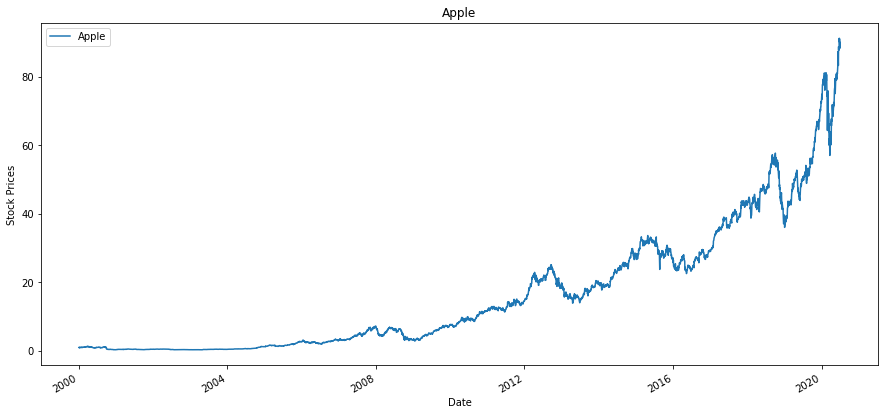

In [20]:

apple['Open'].plot(label = "Apple", figsize = (15,7))
plt.legend()
plt.title("Apple")
plt.ylabel("Stock Prices")

Text(0, 0.5, 'Volume Traded')

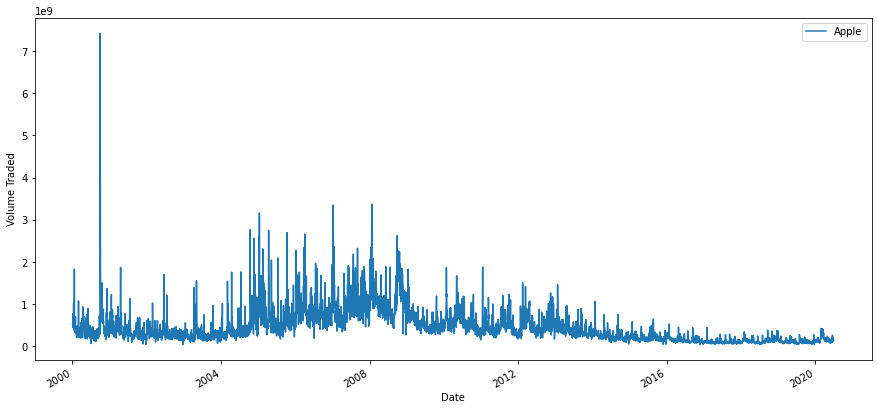

In [7]:
apple['Volume'].plot(label = "Apple", figsize = (15,7))
plt.legend()
plt.ylabel("Volume Traded")

In [8]:
apple['Total_Traded'] = apple['Open'] * apple['Volume']

In [9]:
apple.head()

High       Low      Open     Close       Volume  Adj Close  \
Date                                                                         
2000-01-03  1.004464  0.907924  0.936384  0.999442  535796800.0   0.859423   
2000-01-04  0.987723  0.903460  0.966518  0.915179  512377600.0   0.786965   
2000-01-05  0.987165  0.919643  0.926339  0.928571  778321600.0   0.798481   
2000-01-06  0.955357  0.848214  0.947545  0.848214  767972800.0   0.729382   
2000-01-07  0.901786  0.852679  0.861607  0.888393  460734400.0   0.763932   

            Total_Traded  
Date                      
2000-01-03  5.017116e+08  
2000-01-04  4.952222e+08  
2000-01-05  7.209896e+08  
2000-01-06  7.276888e+08  
2000-01-07  3.969720e+08

Text(0, 0.5, 'Total Traded')

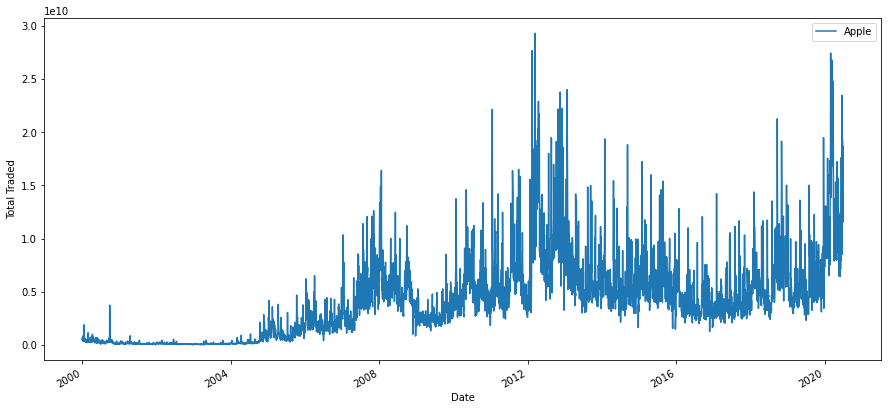

In [10]:
apple['Total_Traded'].plot(label = "Apple", figsize = (15,7))
plt.legend()
plt.ylabel("Total Traded")
# So, we are seeing a visual of market cap here.
#We can definitely say that there has been a lot of volatility in the Tesla Stock.

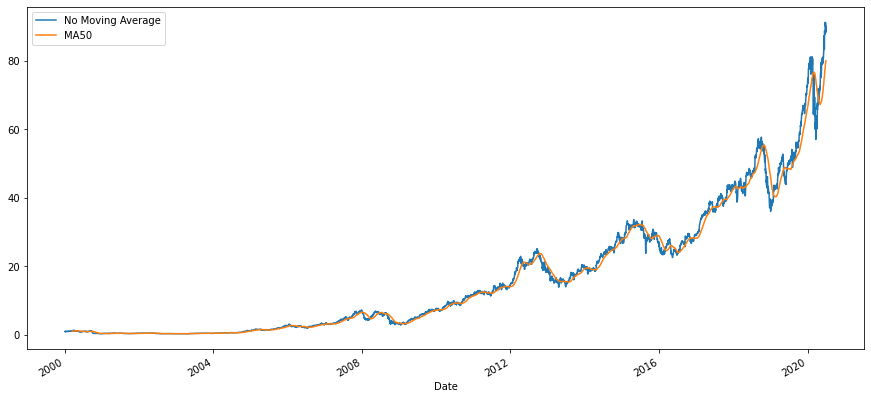

In [11]:
apple['Open'].plot(label = "No Moving Average", figsize = (15,7))
apple["MA50"] = apple['Open'].rolling(50).mean()
apple['MA50'].plot(label = "MA50")
plt.legend()
# This cancels the noise but reduces the trend analysis, but it also gives a better general picture of the stock.

In [12]:
# This is to calculate the "DAILY PERCENTAGE CHANGE"
apple['returns'] = (apple['Close']/apple['Close'].shift(1)) - 1

In [13]:
apple.head()

High       Low      Open     Close       Volume  Adj Close  \
Date                                                                         
2000-01-03  1.004464  0.907924  0.936384  0.999442  535796800.0   0.859423   
2000-01-04  0.987723  0.903460  0.966518  0.915179  512377600.0   0.786965   
2000-01-05  0.987165  0.919643  0.926339  0.928571  778321600.0   0.798481   
2000-01-06  0.955357  0.848214  0.947545  0.848214  767972800.0   0.729382   
2000-01-07  0.901786  0.852679  0.861607  0.888393  460734400.0   0.763932   

            Total_Traded  MA50   returns  
Date                                      
2000-01-03  5.017116e+08   NaN       NaN  
2000-01-04  4.952222e+08   NaN -0.084310  
2000-01-05  7.209896e+08   NaN  0.014633  
2000-01-06  7.276888e+08   NaN -0.086538  
2000-01-07  3.969720e+08   NaN  0.047369

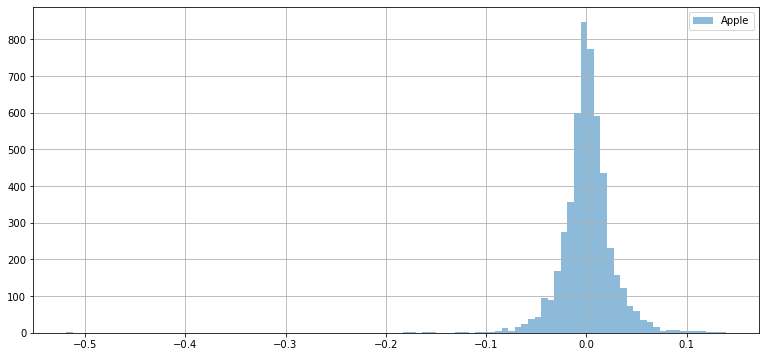

In [14]:
apple['returns'].hist(bins = 100,label = "Apple", alpha = 0.5, figsize = (13,6))
plt.legend()
# The more wider the bend, the more volatile the stock.

In [15]:
apple["Cumulative Return"] = (1 + apple['returns']).cumprod()

In [16]:
apple.head()

High       Low      Open     Close       Volume  Adj Close  \
Date                                                                         
2000-01-03  1.004464  0.907924  0.936384  0.999442  535796800.0   0.859423   
2000-01-04  0.987723  0.903460  0.966518  0.915179  512377600.0   0.786965   
2000-01-05  0.987165  0.919643  0.926339  0.928571  778321600.0   0.798481   
2000-01-06  0.955357  0.848214  0.947545  0.848214  767972800.0   0.729382   
2000-01-07  0.901786  0.852679  0.861607  0.888393  460734400.0   0.763932   

            Total_Traded  MA50   returns  Cumulative Return  
Date                                                         
2000-01-03  5.017116e+08   NaN       NaN                NaN  
2000-01-04  4.952222e+08   NaN -0.084310           0.915690  
2000-01-05  7.209896e+08   NaN  0.014633           0.929089  
2000-01-06  7.276888e+08   NaN -0.086538           0.848688  
2000-01-07  3.969720e+08   NaN  0.047369           0.888889

Text(0.5, 1.0, 'Cumulative Return VS Time')

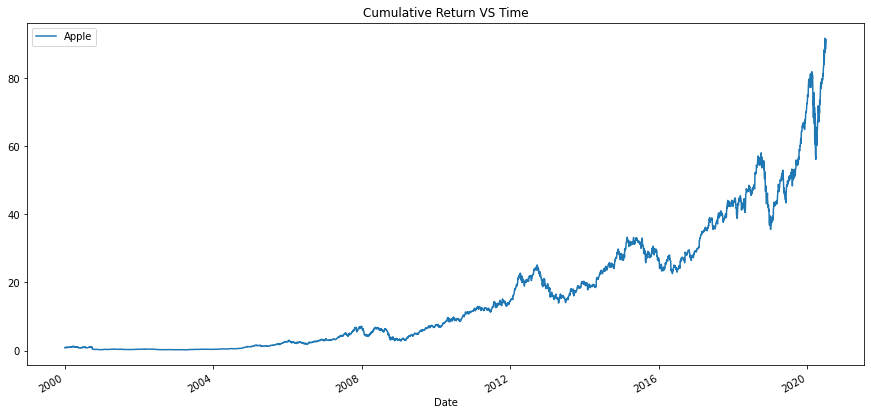

In [17]:
apple['Cumulative Return'].plot(label = "Apple", figsize = (15,7))
plt.legend()
plt.title("Cumulative Return VS Time")

In [11]:
stock_data = pd.read_csv("GRIP_TASK7.csv")
stock_data.head()

Unnamed: 0     Close      Open      High       Low       Volume  \
0  2001-01-02  0.265625  0.265625  0.272321  0.260045  452312000.0   
1  2001-01-03  0.292411  0.258929  0.297991  0.257813  817073600.0   
2  2001-01-04  0.304688  0.323940  0.330357  0.300223  739396000.0   
3  2001-01-05  0.292411  0.302455  0.310268  0.286830  412356000.0   
4  2001-01-08  0.295759  0.302455  0.303292  0.284598  373699200.0   

                                       headline_text  
0  Status quo will not be disturbed at Ayodhya; s...  
1  Powerless north India gropes in the dark,Think...  
2  The string that pulled Stephen Hawking to Indi...  
3  Light combat craft takes India into club class...  
4  Sangh Parivar; Babri panel up the ante,Frontru...

COMBINED STOCK DATA FOR APPLE

In [13]:
stock_data.rename(columns = {'Unnamed: 0' : 'Date'}, inplace = True)
stock_data.head()

Date     Close      Open      High       Low       Volume  \
0  2001-01-02  0.265625  0.265625  0.272321  0.260045  452312000.0   
1  2001-01-03  0.292411  0.258929  0.297991  0.257813  817073600.0   
2  2001-01-04  0.304688  0.323940  0.330357  0.300223  739396000.0   
3  2001-01-05  0.292411  0.302455  0.310268  0.286830  412356000.0   
4  2001-01-08  0.295759  0.302455  0.303292  0.284598  373699200.0   

                                       headline_text  
0  Status quo will not be disturbed at Ayodhya; s...  
1  Powerless north India gropes in the dark,Think...  
2  The string that pulled Stephen Hawking to Indi...  
3  Light combat craft takes India into club class...  
4  Sangh Parivar; Babri panel up the ante,Frontru...

In [14]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91937\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

CALCULATING SENTIMENT SCORES

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

results = []

for headline in stock_data['headline_text']:
    pol_score = SIA().polarity_scores(headline) # run analysis
    pol_score['headline'] = headline # add headlines for viewing
    results.append(pol_score)

results

[{'neg': 0.119,
  'neu': 0.817,
  'pos': 0.064,
  'compound': -0.9621,
  'headline': "Status quo will not be disturbed at Ayodhya; says Vajpayee,Fissures in Hurriyat over Pak visit,America's unwanted heading for India?,For bigwigs; it is destination Goa,Extra buses to clear tourist traffic,Dilute the power of transfers; says Riberio,Focus shifts to teaching of Hindi,IT will become compulsory in schools,Move to stop freedom fighters' pension flayed,Gilani claims he applied for passport 2 years ago,Parivar dismisses PM's warning,India; Pak exchange lists of N-plants,Will Qureshi's return really help the govt?,PM's tacit message: Put Ram tample on hold,Text of the Prime Minister's article,NCW to focus on violence against women,BBC's reality TV will focus on AIIMS,Jaitley firm on legal reforms,Hoshangabad farmers have enough water,BJP jumps into rail track conversion issue,State may take AP to court over Krishna,This official has sued the briber,Park turns temple compound as residents watc

In [34]:
stock_data['Compound'] = pd.DataFrame(results)['compound']
stock_data['Negative'] = pd.DataFrame(results)['neg']
stock_data['Neutral'] = pd.DataFrame(results)['neu']
stock_data['Positive'] = pd.DataFrame(results)['pos']
stock_data.head()

Close  Compound  Negative  Neutral  Positive      Open      High  \
0  0.265625   -0.9621     0.119    0.817     0.064  0.265625  0.272321   
1  0.292411    0.6322     0.084    0.817     0.098  0.258929  0.297991   
2  0.304688    0.6648     0.077    0.843     0.080  0.323940  0.330357   
3  0.292411    0.9253     0.104    0.744     0.152  0.302455  0.310268   
4  0.295759   -0.9638     0.119    0.855     0.026  0.302455  0.303292   

        Low       Volume  
0  0.260045  452312000.0  
1  0.257813  817073600.0  
2  0.300223  739396000.0  
3  0.286830  412356000.0  
4  0.284598  373699200.0

In [29]:
stock_data.shape

(4876, 9)

In [30]:
stock_data.isna().any()

Close       False
Compound    False
Negative    False
Neutral     False
Positive    False
Open        False
High        False
Low         False
Volume      False
dtype: bool

In [31]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4876 entries, 0 to 4875
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     4876 non-null   float64
 1   Compound  4876 non-null   float64
 2   Negative  4876 non-null   float64
 3   Neutral   4876 non-null   float64
 4   Positive  4876 non-null   float64
 5   Open      4876 non-null   float64
 6   High      4876 non-null   float64
 7   Low       4876 non-null   float64
 8   Volume    4876 non-null   float64
dtypes: float64(9)
memory usage: 343.0 KB


In [32]:
stock_data.describe(include='all')

Close     Compound     Negative      Neutral     Positive  \
count  4876.000000  4876.000000  4876.000000  4876.000000  4876.000000   
mean     17.240855    -0.868015     0.126728     0.786119     0.087148   
std      18.701517     0.457865     0.024262     0.033028     0.020960   
min       0.234286    -1.000000     0.000000     0.000000     0.000000   
25%       2.134197    -0.999800     0.113000     0.766000     0.076000   
50%      10.928036    -0.999100     0.128000     0.782000     0.087000   
75%      27.350626    -0.994200     0.142000     0.804000     0.097000   
max      91.632500     1.000000     0.444000     1.000000     0.608000   

              Open         High          Low        Volume  
count  4876.000000  4876.000000  4876.000000  4.876000e+03  
mean     17.231561    17.406451    17.060156  4.515268e+08  
std      18.671171    18.873885    18.500307  3.853229e+08  
min       0.231964     0.235536     0.227143  3.934000e+07  
25%       2.137232     2.173392     2.097143  1.775657e+08  
50%      10.909286    11.007143    10.769643  3.374560e+08  
75%      27.336249    27.606874    27.106250  6.050912e+08  
max      91.250000    93.095001    90.567497  3.372970e+09

In [33]:
stock_data.head()

Close  Compound  Negative  Neutral  Positive      Open      High  \
0  0.265625   -0.9621     0.119    0.817     0.064  0.265625  0.272321   
1  0.292411    0.6322     0.084    0.817     0.098  0.258929  0.297991   
2  0.304688    0.6648     0.077    0.843     0.080  0.323940  0.330357   
3  0.292411    0.9253     0.104    0.744     0.152  0.302455  0.310268   
4  0.295759   -0.9638     0.119    0.855     0.026  0.302455  0.303292   

        Low       Volume  
0  0.260045  452312000.0  
1  0.257813  817073600.0  
2  0.300223  739396000.0  
3  0.286830  412356000.0  
4  0.284598  373699200.0

PPREPARING DATA FOR MODELING

In [35]:
# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_data)-1))

# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(stock_data)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 3900
Number of records in Test Data: 976


In [36]:
# predicting one step ahead
steps_to_predict = 1

# capturing data to be used for each column
close_price = stock_data.iloc[start:total_data,0] #close
compound = stock_data.iloc[start:total_data,1] #compound
negative = stock_data.iloc[start:total_data,2] #neg
neutral = stock_data.iloc[start:total_data,3] #neu
positive = stock_data.iloc[start:total_data,4] #pos
open_price = stock_data.iloc[start:total_data,5] #open
high = stock_data.iloc[start:total_data,6] #high
low = stock_data.iloc[start:total_data,7] #low
volume = stock_data.iloc[start:total_data,8] #volume

# printing close price
print("Close Price:")
close_price

Close Price:


1        0.292411
2        0.304688
3        0.292411
4        0.295759
5        0.306920
          ...    
4871    90.014999
4872    91.209999
4873    88.407501
4874    90.445000
4875    91.199997
Name: Close, Length: 4875, dtype: float64

In [37]:
# shifting next day close
close_price_shifted = close_price.shift(-1) 

# shifting next day compound
compound_shifted = compound.shift(-1) 

# concatenating the captured training data into a dataframe
data = pd.concat([close_price, close_price_shifted, compound, compound_shifted, volume, open_price, high, low], axis=1)

# setting column names of the revised stock data
data.columns = ['close_price', 'close_price_shifted', 'compound', 'compound_shifted','volume', 'open_price', 'high', 'low']

# dropping nulls
data = data.dropna()    
data.head(10)

close_price  close_price_shifted  compound  compound_shifted       volume  \
1      0.292411             0.304688    0.6322            0.6648  817073600.0   
2      0.304688             0.292411    0.6648            0.9253  739396000.0   
3      0.292411             0.295759    0.9253           -0.9638  412356000.0   
4      0.295759             0.306920   -0.9638           -0.9559  373699200.0   
5      0.306920             0.295759   -0.9559           -0.5719  588929600.0   
6      0.295759             0.366071   -0.5719            0.9295  580781600.0   
7      0.366071             0.366071    0.9295           -0.9039  879530400.0   
8      0.366071             0.356027   -0.9039           -0.9838  717091200.0   
9      0.356027             0.349330   -0.9838            0.8926  489708800.0   
10     0.349330             0.387277    0.8926            0.9697  482820800.0   

    open_price      high       low  
1     0.258929  0.297991  0.257813  
2     0.323940  0.330357  0.300223  
3     0.302455  0.310268  0.286830  
4     0.302455  0.303292  0.284598  
5     0.300223  0.315011  0.295759  
6     0.297991  0.303571  0.286830  
7     0.344866  0.373884  0.340402  
8     0.368304  0.369420  0.349330  
9     0.367188  0.367188  0.352679  
10    0.348214  0.353795  0.340402

# setting the target variable as the shifted close_price

In [38]:

y = data['close_price_shifted']
y

1        0.304688
2        0.292411
3        0.295759
4        0.306920
5        0.295759
          ...    
4870    90.014999
4871    91.209999
4872    88.407501
4873    90.445000
4874    91.199997
Name: close_price_shifted, Length: 4874, dtype: float64

In [39]:
# setting the features dataset for prediction  
cols = ['close_price', 'compound', 'compound_shifted', 'volume', 'open_price', 'high', 'low']
x = data[cols]
x

close_price  compound  compound_shifted       volume  open_price  \
1        0.292411    0.6322            0.6648  817073600.0    0.258929   
2        0.304688    0.6648            0.9253  739396000.0    0.323940   
3        0.292411    0.9253           -0.9638  412356000.0    0.302455   
4        0.295759   -0.9638           -0.9559  373699200.0    0.302455   
5        0.306920   -0.9559           -0.5719  588929600.0    0.300223   
...           ...       ...               ...          ...         ...   
4870    91.632500   -0.9999           -0.9997  212155600.0   91.000000   
4871    90.014999   -0.9997           -0.9999  192623200.0   91.250000   
4872    91.209999   -0.9999           -0.9999  137522400.0   90.175003   
4873    88.407501   -0.9999           -0.9997  205256800.0   91.102501   
4874    90.445000   -0.9997           -0.9998  130646000.0   88.312500   

           high        low  
1      0.297991   0.257813  
2      0.330357   0.300223  
3      0.310268   0.286830  
4      0.303292   0.284598  
5      0.315011   0.295759  
...         ...        ...  
4870  93.095001  90.567497  
4871  92.197502  89.629997  
4872  91.250000  89.392502  
4873  91.330002  88.254997  
4874  90.542503  87.820000  

[4874 rows x 7 columns]

# scaling the feature dataset

In [40]:

scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
x = np.array(x).reshape((len(x) ,len(cols)))
x = scaler_x.fit_transform(x)

# scaling the target variable
scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)

# displaying the scaled feature dataset and the target variable
x, y

(array([[-0.99872809,  0.6322    ,  0.6648    , ..., -0.99940748,
         -0.99865485, -0.99932101],
        [-0.99845944,  0.6648    ,  0.9253    , ..., -0.99797895,
         -0.99795775, -0.99838212],
        [-0.99872809,  0.9253    , -0.9638    , ..., -0.99845105,
         -0.99839043, -0.99867862],
        ...,
        [ 0.99075473, -0.9999    , -0.9999    , ...,  0.97637838,
          0.96026251,  0.97398736],
        [ 0.92942973, -0.9999    , -0.9997    , ...,  0.9967589 ,
          0.96198558,  0.94880472],
        [ 0.97401481, -0.9997    , -0.9998    , ...,  0.93545235,
          0.9450245 ,  0.93917452]]),
 array([[-0.99845944],
        [-0.99872809],
        [-0.99865483],
        ...,
        [ 0.92942973],
        [ 0.97401481],
        [ 0.99053586]]))

# preparing training and test dataset

In [41]:

X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (3900, 7) and y: (3900, 1)
Number of rows and columns in the Test set X: (973, 7) and y: (973, 1)


In [42]:
# reshaping the feature dataset for feeding into the model
X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (3900, 7, 1)
Shape of Test set X: (973, 7, 1)


# setting the seed to achieve consistent and less random predictions at each execution

In [43]:

np.random.seed(2016)

# setting the model architecture
model=Sequential()
model.add(LSTM(100,return_sequences=True,activation='tanh',input_shape=(len(cols),1)))
model.add(Dropout(0.1))
model.add(LSTM(100,return_sequences=True,activation='tanh'))
model.add(Dropout(0.1))
model.add(LSTM(100,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))

# printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 100)            40800     
_________________________________________________________________
dropout (Dropout)            (None, 7, 100)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 100)            80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 100)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [44]:
# compiling the model
model.compile(loss='mse' , optimizer='adam')

# fitting the model using the training dataset
model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=8, verbose=1)

Epoch 1/10
390/390 [==============================] - 52s 20ms/step - loss: 0.0709 - val_loss: 0.1451
Epoch 2/10
390/390 [==============================] - 5s 13ms/step - loss: 0.0124 - val_loss: 0.0028
Epoch 3/10
390/390 [==============================] - 5s 13ms/step - loss: 0.0029 - val_loss: 7.3543e-04
Epoch 4/10
390/390 [==============================] - 5s 13ms/step - loss: 0.0020 - val_loss: 6.1196e-04
Epoch 5/10
390/390 [==============================] - 5s 12ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 6/10
390/390 [==============================] - 5s 13ms/step - loss: 0.0019 - val_loss: 8.3459e-04
Epoch 7/10
390/390 [==============================] - 5s 13ms/step - loss: 0.0015 - val_loss: 6.2301e-04
Epoch 8/10
390/390 [==============================] - 5s 12ms/step - loss: 0.0013 - val_loss: 4.9132e-04
Epoch 9/10
390/390 [==============================] - 5s 12ms/step - loss: 0.0014 - val_loss: 3.7887e-04
Epoch 10/10
390/390 [==============================] - 5s 13ms/ste

In [45]:
# saving the model as a json file
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights('model.h5')
print('Model is saved to the disk')

Model is saved to the disk


# performing predictions

In [46]:

predictions = model.predict(X_test) 

# unscaling the predictions
predictions = scaler_y.inverse_transform(np.array(predictions).reshape((len(predictions), 1)))

# printing the predictions
print('Predictions:')
predictions[0:5]

Predictions:


array([[27.739515],
       [27.838062],
       [27.759762],
       [27.646217],
       [27.724787]], dtype=float32)

Evaluation

In [47]:

# calculating the training mean-squared-error
train_loss = model.evaluate(X_train, y_train, batch_size = 1)

# calculating the test mean-squared-error
test_loss = model.evaluate(X_test, y_test, batch_size = 1)

# printing the training and the test mean-squared-errors
print('Train Loss =', round(train_loss,4))
print('Test Loss =', round(test_loss,4))

973/973 [==============================] - 4s 4ms/step - loss: 0.0019
Train Loss = 0.0001
Test Loss = 0.0019


In [48]:
# unscaling the test feature dataset, x_test
X_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))

# unscaling the test y dataset, y_test
y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

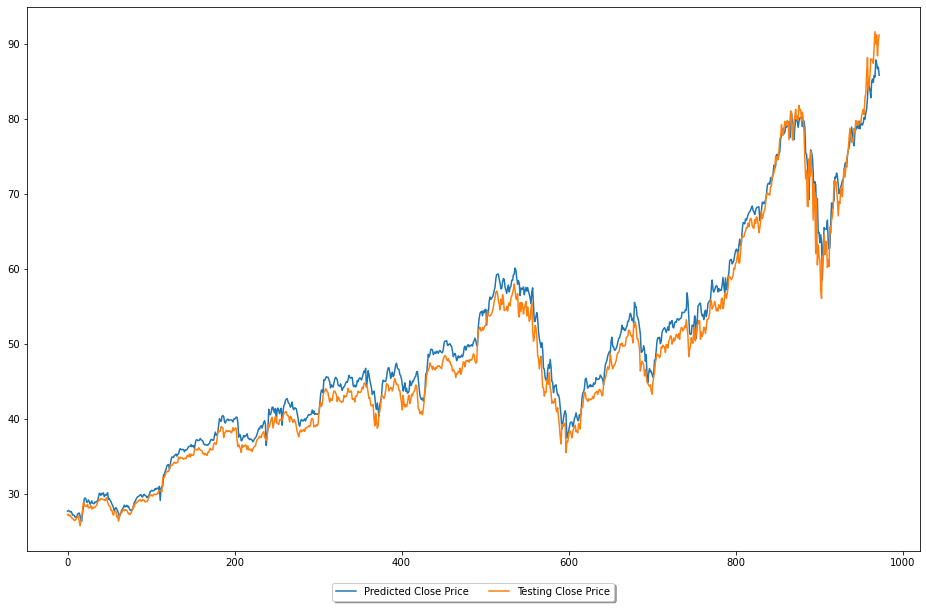

In [49]:
# plotting
plt.figure(figsize=(16,10))

# plt.plot([row[0] for row in y_train], label="Training Close Price")
plt.plot(predictions, label="Predicted Close Price")
plt.plot([row[0] for row in y_test], label="Testing Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.show()